In [1]:
import pandas as pd

In [2]:
pd.__version__

'2.3.3'

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

plt.style.use("seaborn-v0_8")


In [4]:
df = pd.read_csv("telco_customer_churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
import os
os.getcwd()


'C:\\Users\\gifte\\telco_churn_project'

In [6]:
import os
os.listdir()


['.ipynb_checkpoints',
 'telco_churn_dashboard_data.csv',
 'telco_customer_churn.csv',
 'Telco_Customer_Churn_Analysis.ipynb']

In [7]:
%whos


Variable                 Type         Data/Info
-----------------------------------------------
LogisticRegression       type         <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
RandomForestClassifier   ABCMeta      <class 'sklearn.ensemble.<...>.RandomForestClassifier'>
StandardScaler           type         <class 'sklearn.preproces<...>ng._data.StandardScaler'>
classification_report    function     <function classification_<...>rt at 0x0000023ABC92F740>
confusion_matrix         function     <function confusion_matrix at 0x0000023ABC92E520>
df                       DataFrame    Shape: (7043, 21)
np                       module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
os                       module       <module 'os' from 'C:\\Us<...>\\anaconda3\\Lib\\os.py'>
pd                       module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt                      module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
roc_auc_

In [8]:
df.shape


(7043, 21)

In [9]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
df.describe(include="all")


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [11]:
# Initial Observations
# The dataset contains customer-level subscription and service information.
# The target variable is `Churn`, indicating whether a customer has left the service.
# Several categorical variables describe services, contracts, and payment methods.
# Initial inspection suggests potential data quality issues that will be addressed during cleaning.


In [12]:
df.columns


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [13]:
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df["TotalCharges"].isnull().sum()



np.int64(0)

In [15]:
df["TotalCharges"].dtype

dtype('O')

In [16]:
df["TotalCharges"].head(10)


0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
5      820.5
6     1949.4
7      301.9
8    3046.05
9    3487.95
Name: TotalCharges, dtype: object

In [17]:
# Convert TotalCharges to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

# Check how many values became NaN
df["TotalCharges"].isnull().sum()


np.int64(11)

In [18]:
df["TotalCharges"] = df["TotalCharges"].fillna(0)


In [19]:
df["Churn"].value_counts()


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [20]:
#Convert "Yes" to 1 and "No" to 0
# Created Churn_Flag column
df["Churn_Flag"] = df["Churn"].map({"Yes": 1, "No": 0})
df["Churn_Flag"].value_counts()


Churn_Flag
0    5174
1    1869
Name: count, dtype: int64

In [21]:
# Data Cleaning Summary
# Converted `TotalCharges` from text to numeric and handled missing values.
# Missing `TotalCharges` were associated with customers with zero tenure and were set to 0.
# Created a binary churn indicator (`Churn_Flag`) for modeling purposes.
# Preserved original categorical variables for interpretability and analysis.


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [23]:
# Target Variable Validation
#The target variable for this analysis is customer churn (`Churn`), indicating whether a customer discontinued service.
#The column contains only two valid values ("Yes" and "No") with no missing entries.
#For modeling purposes, a binary churn indicator (`Churn_Flag`) was created, where 1 represents churn and 0 represents retention.
#The distribution of the target variable indicates a realistic churn rate, making it suitable for classification modeling.

    

In [24]:
## View contract types
df["Contract"].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [25]:
## View churn rate by contract
contract_churn = (
    df.groupby("Contract")["Churn"]
      .value_counts(normalize=True) ## divide each count by the total no of customers in the group
      .rename("proportion")
      .reset_index() ## convert into a plotable table
)

contract_churn


,Contract,Churn,proportion
0,Month-to-month,No,0.572903
1,Month-to-month,Yes,0.427097
2,One year,No,0.887305
3,One year,Yes,0.112695
4,Two year,No,0.971681
5,Two year,Yes,0.028319


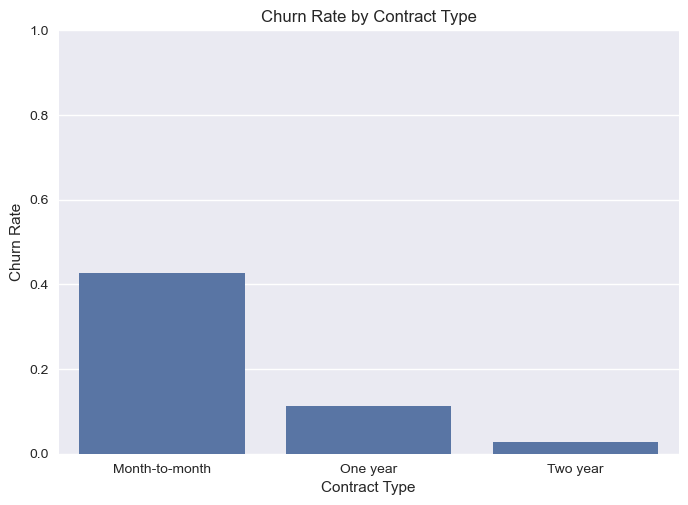

In [26]:
sns.barplot(
    data=contract_churn[contract_churn["Churn"] == "Yes"],
    x="Contract",
    y="proportion"
)

plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.xlabel("Contract Type")
plt.ylim(0, 1)
plt.show()


In [27]:
#**Insight:**
#Customers on month-to-month contracts exhibit significantly higher churn rates compared to those on one-year or two-year contracts. 
#Longer contract commitments are associated with lower churn, suggesting that contractual lock-in and customer stability play an important role in retention.


In [28]:
df ["tenure"].value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [29]:
## view number of unique values in tenureC
df["tenure"].nunique() 


73

In [30]:
## Creating tenure bucket, 3 months group
df["tenure_group"] = pd.cut(
    df["tenure"],
    bins=[-1, 3, 12, 24, 72], ## -1 used to include customers with 0 tenure
    ## -1 -3, 4-12, 13-24, 25-72.
    labels=["0–3 months", "4–12 months", "13–24 months", "25+ months"]
)


In [31]:
df["tenure_group"].value_counts()

tenure_group
25+ months      3833
4–12 months     1124
0–3 months      1062
13–24 months    1024
Name: count, dtype: int64

In [32]:
## Check churn rate by tenure
tenure_bin = (
    df.groupby("tenure_group")["Churn"]
    .value_counts(normalize=True)
    .rename("proportion")
    .reset_index()
)

tenure_bin

C:\Users\gifte\AppData\Local\Temp\ipykernel_45392\881958281.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("tenure_group")["Churn"]


,tenure_group,Churn,proportion
0,0–3 months,Yes,0.562147
1,0–3 months,No,0.437853
2,4–12 months,No,0.608541
3,4–12 months,Yes,0.391459
4,13–24 months,No,0.712891
5,13–24 months,Yes,0.287109
6,25+ months,No,0.859640
7,25+ months,Yes,0.140360


In [33]:
## Check only churners
tenure_bin[tenure_bin["Churn"] == "Yes"]

,tenure_group,Churn,proportion
0,0–3 months,Yes,0.562147
3,4–12 months,Yes,0.391459
5,13–24 months,Yes,0.287109
7,25+ months,Yes,0.140360


In [34]:
## Insight: Recent customers exhibit higher churn rate compared to customers with longer tenure

In [35]:
df["monthly_charge_bin"] = pd.cut(
    df["MonthlyCharges"],
    bins=[0, 35, 70, 120],
    labels=["Low", "Medium", "High"]
)

charge_churn = (
    df.groupby("monthly_charge_bin")["Churn"]
      .value_counts(normalize=True)
      .rename("proportion")
      .reset_index()
)

charge_churn


C:\Users\gifte\AppData\Local\Temp\ipykernel_45392\1659895296.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("monthly_charge_bin")["Churn"]


,monthly_charge_bin,Churn,proportion
0,Low,No,0.891066
1,Low,Yes,0.108934
2,Medium,No,0.760580
3,Medium,Yes,0.239420
4,High,No,0.646386
5,High,Yes,0.353614


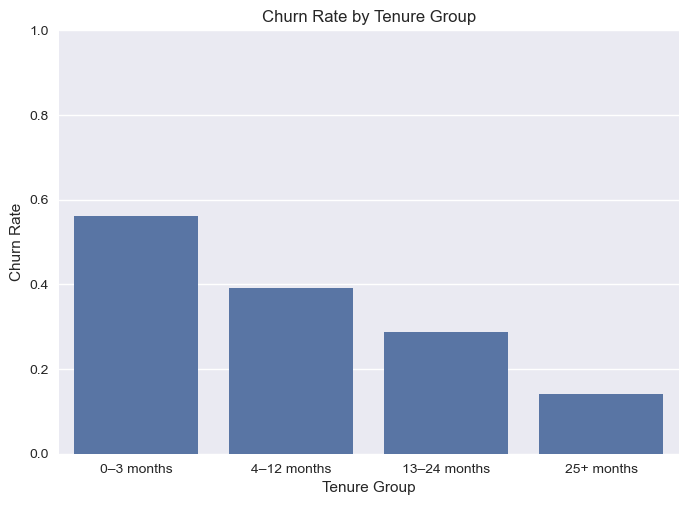

In [36]:
sns.barplot(
    data=tenure_bin[tenure_bin["Churn"] == "Yes"],
    x="tenure_group",
    y="proportion"
)

plt.title("Churn Rate by Tenure Group")
plt.ylabel("Churn Rate")
plt.xlabel("Tenure Group")
plt.ylim(0, 1)
plt.show()
    

### Monthly Charges vs Churn
#Pricing can influence customer retention. This analysis examines whether customers with higher monthly charges are more likely to churn.


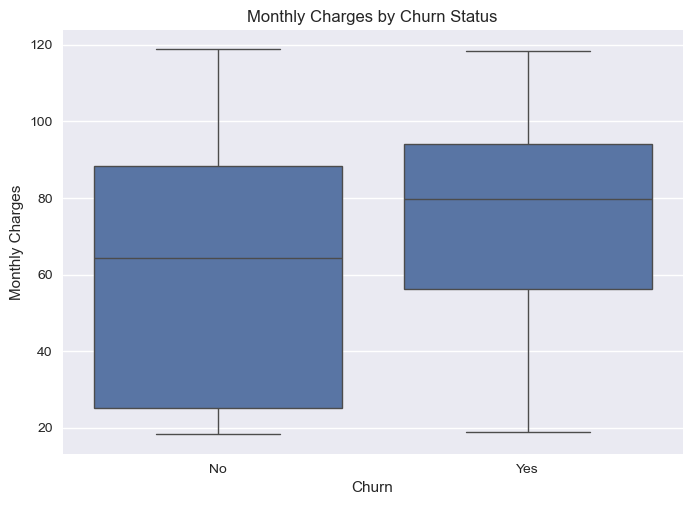

In [37]:
sns.boxplot(data=df, x="Churn", y="MonthlyCharges")
plt.title("Monthly Charges by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()


In [38]:
df.groupby("Churn")["MonthlyCharges"].describe()


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
No,5174.0,61.265124,31.092648,18.25,25.10,64.425,88.4,118.75
Yes,1869.0,74.441332,24.666053,18.85,56.15,79.650,94.2,118.35


In [39]:
df["monthly_charge_bin"] = pd.cut(
    df["MonthlyCharges"],
    bins=[0, 35, 70, 120],
    labels=["Low", "Medium", "High"]
)

charge_churn = (
    df.groupby("monthly_charge_bin")["Churn"]
      .value_counts(normalize=True)
      .rename("proportion")
      .reset_index()
)

charge_churn


C:\Users\gifte\AppData\Local\Temp\ipykernel_45392\1659895296.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("monthly_charge_bin")["Churn"]


,monthly_charge_bin,Churn,proportion
0,Low,No,0.891066
1,Low,Yes,0.108934
2,Medium,No,0.760580
3,Medium,Yes,0.239420
4,High,No,0.646386
5,High,Yes,0.353614


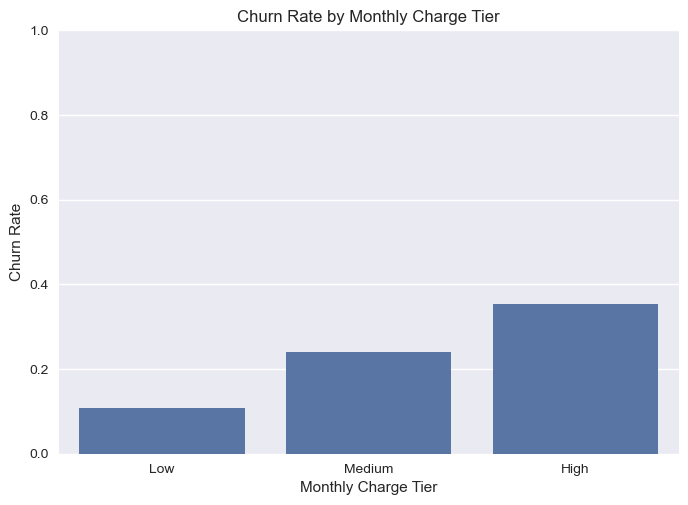

In [40]:
sns.barplot(
    data=charge_churn[charge_churn["Churn"] == "Yes"],
    x="monthly_charge_bin",
    y="proportion"
)
plt.title("Churn Rate by Monthly Charge Tier")
plt.xlabel("Monthly Charge Tier")
plt.ylabel("Churn Rate")
plt.ylim(0, 1)
plt.show()


In [41]:
##Insight:** Churn rates increase with higher monthly charge tiers, 
##indicating that customers on higher-priced plans may require stronger
##value justification or targeted retention offers.


In [42]:
#*Session paused here. EDA completed. Feature engineering next


In [43]:
# List of service-related columns to analyze
# This does NOT create new columns — it just stores column names
service_cols = [
    "PhoneService",
    "OnlineSecurity",
    "OnlineBackup",
    "DeviceProtection",
    "TechSupport",
    "StreamingTV",
    "StreamingMovies"
]

# Create a new column called 'num_services'
# For each row (customer):
# 1. Look only at the service columns
# 2. Check which values are "Yes"
# 3. Count how many "Yes" values there are
df["num_services"] = (
    df[service_cols]
      .apply(
          lambda x: (x == "Yes").sum(),  # x represents ONE row because axis=1
          axis=1                         # axis=1 means apply the function row by row
      )
)

# Display the first 20 values of the newly created column
# num_services represents how many optional services each customer has
df["num_services"].head(20)


0     1
1     3
2     3
3     3
4     1
5     4
6     3
7     1
8     5
9     3
10    2
11    1
12    4
13    5
14    6
15    7
16    1
17    5
18    3
19    4
Name: num_services, dtype: int64

In [44]:
# Create a new binary column 'auto_payment'
# This column indicates whether a customer uses an automatic payment method
# 1 = customer uses automatic payment
# 0 = customer does NOT use automatic payment
# Payment friction refers to the effort and potential points of failure involved in completing recurring payments. 
# Customers using automatic payment methods experience lower payment friction, while manual payment methods introduce higher friction due to missed or failed payments. 
# Lower payment friction is generally associated with improved customer retention.


df["auto_payment"] = (
    df["PaymentMethod"]                 # Select the PaymentMethod text column
      .str.contains("automatic")        # Check if the word "automatic" appears in each value (returns True/False)
      .astype(int)                      # Convert True -> 1 and False -> 0
)

# Count how many customers fall into each category (0 or 1)
# This helps us understand the distribution of automatic vs non-automatic payments
# auto_payment is a numeric flag showing whether a customer is enrolled in automatic payments

df["auto_payment"].value_counts()


auto_payment
0    3977
1    3066
Name: count, dtype: int64

In [45]:
# Count 
df["SeniorCitizen"].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [46]:
# Check for engineered features: top 10
df[["tenure_group", "num_services", "auto_payment", "Churn"]].head()

,tenure_group,num_services,auto_payment,Churn
0,0–3 months,1,0,No
1,25+ months,3,0,No
2,0–3 months,3,0,Yes
3,25+ months,3,1,No
4,0–3 months,1,0,Yes


In [47]:
#Feature Engineering Summary
#Several features were engineered to better capture customer engagement and retention behavior. 
#Customer tenure was grouped into lifecycle-based categories, and the
#number of subscribed services was calculated to represent engagement depth. 
#An automatic payment flag was created to account for payment friction. 
#These engineered features are expected to improve churn prediction while remaining interpretable.


In [48]:
features = [
    "tenure",
    "MonthlyCharges",
    "num_services",
    "auto_payment",
    "SeniorCitizen"
]

X = df[features]
y = df["Churn_Flag"]


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [51]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [52]:
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]


In [53]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)


array([[1171,  123],
       [ 240,  227]])

In [54]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1294
           1       0.65      0.49      0.56       467

    accuracy                           0.79      1761
   macro avg       0.74      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761



In [55]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1294
           1       0.65      0.49      0.56       467

    accuracy                           0.79      1761
   macro avg       0.74      0.70      0.71      1761
weighted avg       0.78      0.79      0.78      1761



In [56]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred_proba)


0.8282188589073601

In [57]:
# Logistic Regression Model Performance
#A logistic regression model was trained to predict customer churn using tenure, pricing, engagement, payment behavior, and demographic features.
# Model evaluation focused on recall and ROC-AUC to assess the model’s ability to correctly identify churners.
# The model provides an interpretable baseline for understanding key churn drivers.


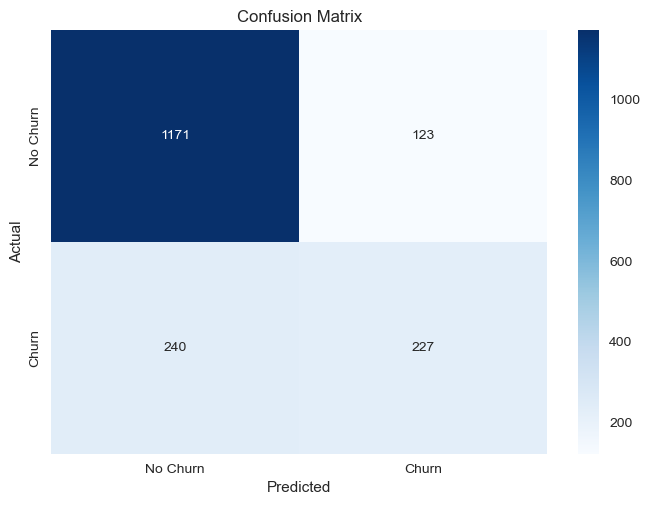

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Churn", "Churn"],
    yticklabels=["No Churn", "Churn"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [59]:
# Recreate tenure group cos of the - encoding misread in csv
df["tenure_group"] = pd.cut(
    df["tenure"],
    bins=[-1, 3, 12, 24, 72],
    labels=["0-3 months", "4-12 months", "13-24 months", "25+ months"]
)


In [60]:
#Export selected columns
export_cols = [
    "customerID",
    "Churn",
    "tenure_group",
    "Contract",
    "MonthlyCharges",
    "monthly_charge_bin",
    "num_services",
    "PaymentMethod",
    "auto_payment"
]

df[export_cols].to_csv("telco_churn.csv", index=False)

